# Proyek Analisis Data: Nama dataset
- Nama: Clara Carissa
- Email: rissa0703.cc@gmail.com
- Id Dicoding: clara_carissa_7cho

## Menentukan Pertanyaan Bisnis

- Di musim apa sepeda paling banyak dan paling sedikit dipinjam?
- Di pukul berapa sepeda paling banyak dan paling sedikit dipinjam?
- Bagaimana rata-rata peminjaman sepeda setiap harinya?
- Bagaimana performa peminjaman sepeda oleh pengguna yang terdaftar (Registered) tiap bulannya di tahun 2011 - 2012?

## Menyiapkan semua library yang dibutuhkan

In [1]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Load Day Dataset
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Load Hour Dataset
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Day**

In [4]:
#Get information (number of columns, column labels, data types, memory usage, range index, and the number of cells) from day dataframe
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#Check whether day dataframe contains missing or null value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#Check duplicate value in day dataframe
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
#Returns description of day dataframe
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Hour**

In [8]:
#Get information (number of columns, column labels, data types, memory usage, range index, and the number of cells) from hour dataframe
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
##Check whether hour dataframe contains missing or null value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#Check duplicate value in hour dataframe
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
##Returns description of day dataframe
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

**Day**

In [12]:
#Change dteday column Data Type
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [13]:
#Check whether data type of dteday column has been changed
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
day_df.to_csv("day_clean.csv", index=False)

**Hour**

In [15]:
#Change dteday column Data Type
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [16]:
#Check whether data type of dteday column has been changed
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [17]:
hour_df.to_csv("hour_clean.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore Day DataFrame

In [18]:
#Change label of season by adding new column called season_new
day_df["season_new"] = day_df.season.apply(lambda x: "Spring" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))

In [19]:
#Make pivot table by season_new
day_df.groupby(by=["season_new"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season_new,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


In [20]:
#Change label of weekday by adding new column called weekday_new
day_df["weekday_new"] = day_df.weekday.apply(lambda x: "Sunday" if x == 0 else ("Monday" if x == 1 else ("Tuesday" if x == 2 else ("Wednesday" if x == 3
                                              else ("Thursday" if x == 4 else ("Friday" if x == 5 else "Saturday"))))))

In [21]:
#Get top 5 column of day dataframe
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_new,weekday_new
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,Saturday
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,Sunday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,Monday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring,Tuesday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring,Wednesday


In [22]:
#Make pivot table by weekday_new
day_df.groupby(by=["weekday_new"]).agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

,casual,registered,cnt
weekday_new,,,
Friday,752.288462,3938.000000,4690.288462
Monday,674.133333,3663.990476,4338.123810
Saturday,1465.257143,3085.285714,4550.542857
Sunday,1338.295238,2890.533333,4228.828571
Thursday,590.961538,4076.298077,4667.259615
Tuesday,556.182692,3954.480769,4510.663462
Wednesday,551.144231,3997.394231,4548.538462


In [23]:
#Get year only from dteday column and make it new column called Year
day_df['Year'] = day_df['dteday'].dt.strftime('%Y')
day_df['Year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: Year, dtype: object

In [24]:
#Make pivot table by year and month
yr_mnth_df=day_df.groupby(by=["Year", "mnth"]).agg({
                  "casual": "sum",
                  "registered": "sum",
                  "cnt": "sum"
            })

yr_mnth_df.head()

casual  registered     cnt
Year mnth                            
2011 1       3073       35116   38189
     2       6242       41973   48215
     3      12826       51219   64045
     4      22346       72524   94870
     5      31050      104771  135821

### Explore Hour DataFrame

In [25]:
#Make pivot table by hour
hour_df.groupby(by=["hr"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


In [26]:
#Change label of weekday by adding new column called weekday_new
hour_df["weekday_new"] = hour_df.weekday.apply(lambda x: "Sunday" if x == 0 else ("Monday" if x == 1 else ("Tuesday" if x == 2 else ("Wednesday" if x == 3
                                              else ("Thursday" if x == 4 else ("Friday" if x == 5 else "Saturday"))))))

In [27]:
#Get top 5 rows of hour dataframe
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_new
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Saturday
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Saturday
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Saturday
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Saturday
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Saturday


## Visualization & Explanatory Analysis

### Pertanyaan 1: Di musim apa sepeda paling banyak dan paling sedikit dipinjam?

In [28]:
# Create pivot table based on EDA to make visualization
sum_season_df = day_df.groupby("season_new").cnt.sum().sort_values(ascending=False).reset_index()
sum_season_df.head()

,season_new,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


<ipython-input-29-60a0162aeaab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="season_new", data=sum_season_df.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])
<ipython-input-29-60a0162aeaab>:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="cnt", y="season_new", data=sum_season_df.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])
<ipython-input-29-60a0162aeaab>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="season_new", data=sum_season_df.sort_values(by="cnt", ascending=True), palette=colors, ax=ax[1])
<ipython-input-29-60a0162aeaab>:12: UserWarning: The palette li

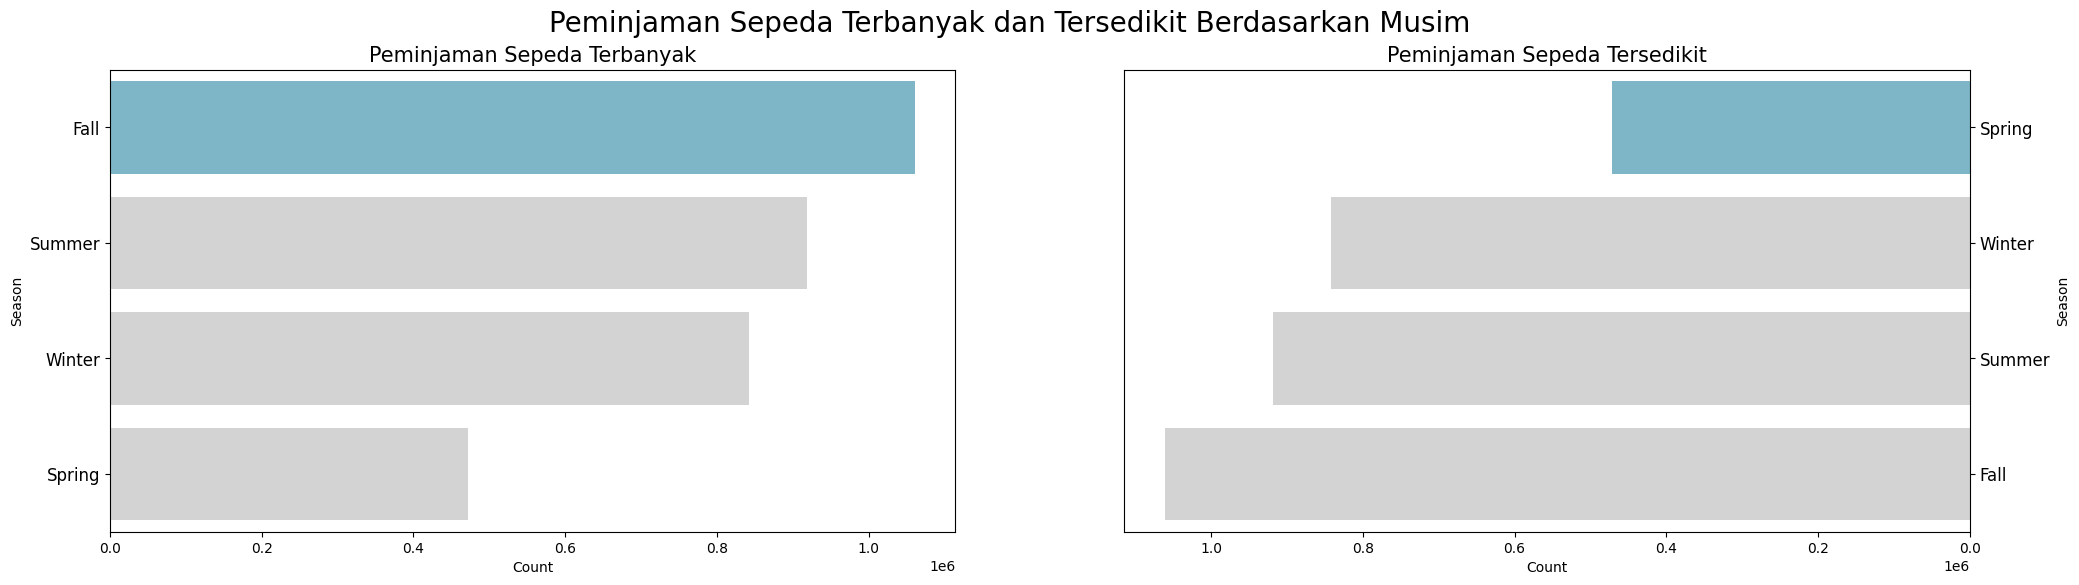

In [29]:
# Create visualization for the question
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="cnt", y="season_new", data=sum_season_df.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])
ax[0].set_ylabel("Season", size=10)
ax[0].set_xlabel("Count", size=10)
ax[0].set_title("Peminjaman Sepeda Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="cnt", y="season_new", data=sum_season_df.sort_values(by="cnt", ascending=True), palette=colors, ax=ax[1])
ax[1].set_ylabel("Season", size=10)
ax[1].set_xlabel("Count", size=10)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Peminjaman Sepeda Tersedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Peminjaman Sepeda Terbanyak dan Tersedikit Berdasarkan Musim", fontsize=20)
plt.show()

### Pertanyaan 2: Di pukul berapa sepeda paling banyak dan paling sedikit dipinjam?

In [30]:
# Create pivot table based on EDA to make visualization
sum_hr_df = hour_df.groupby("hr").cnt.sum().sort_values(ascending=False).reset_index()
sum_hr_df.head()

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789


<ipython-input-31-c9a59a67da36>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=sum_hr_df.sort_values(by="cnt", ascending=False).head(5), palette=coolors, ax=ax[0])
<ipython-input-31-c9a59a67da36>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=sum_hr_df.sort_values(by="cnt", ascending=True).head(5), palette=coolorss, ax=ax[1])


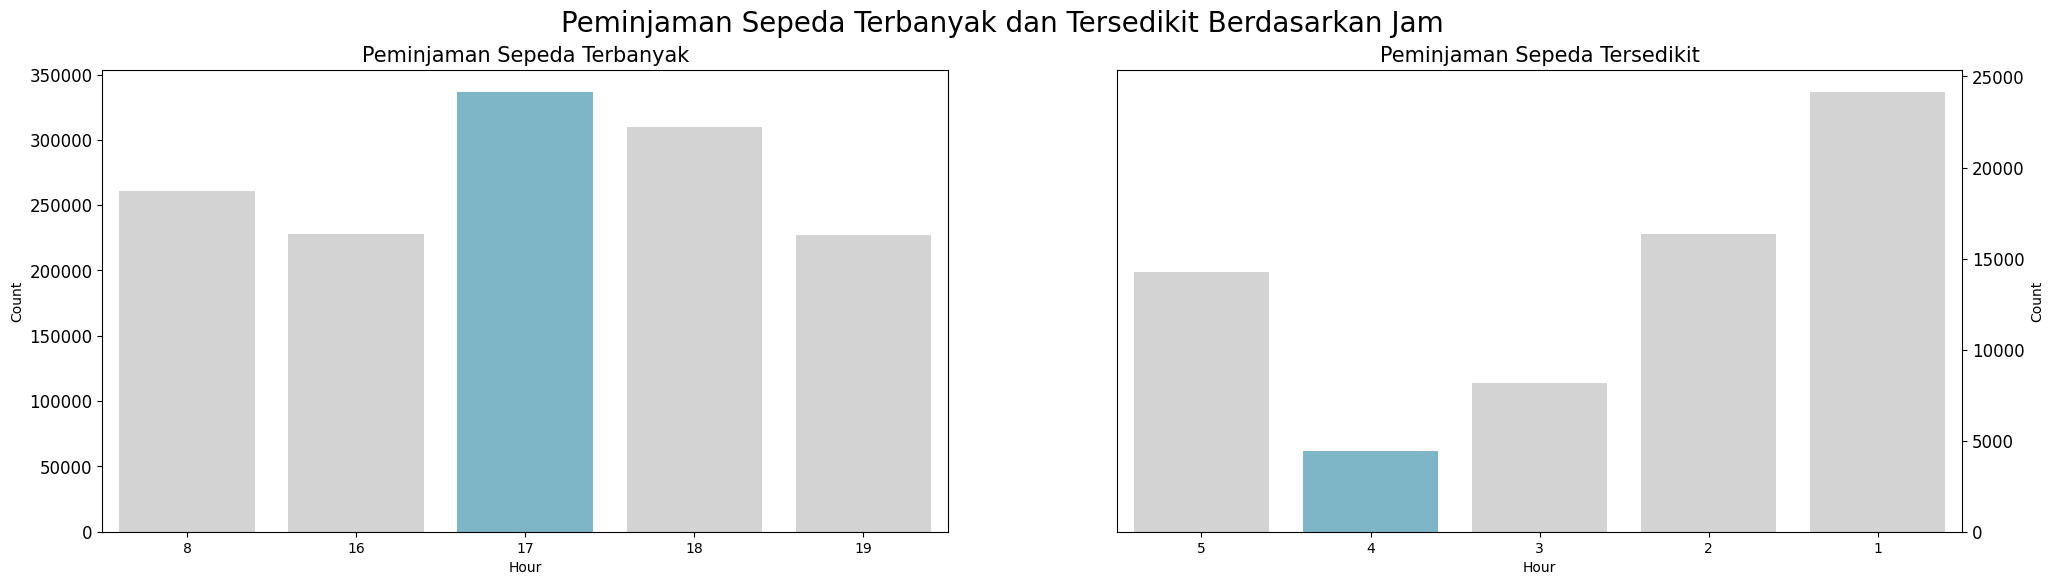

In [31]:
# Create visualization for the question
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

coolors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"]
coolorss = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

sns.barplot(x="hr", y="cnt", data=sum_hr_df.sort_values(by="cnt", ascending=False).head(5), palette=coolors, ax=ax[0])
ax[0].set_ylabel("Count", size=10)
ax[0].set_xlabel("Hour", size=10)
ax[0].set_title("Peminjaman Sepeda Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="hr", y="cnt", data=sum_hr_df.sort_values(by="cnt", ascending=True).head(5), palette=coolorss, ax=ax[1])
ax[1].set_ylabel("Count", size=10)
ax[1].set_xlabel("Hour", size=10)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Peminjaman Sepeda Tersedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Peminjaman Sepeda Terbanyak dan Tersedikit Berdasarkan Jam", fontsize=20)
plt.show()

### Pertanyaan 3: Bagaimana rata-rata peminjaman sepeda tiap harinya?

In [32]:
# Create pivot table based on EDA to make visualization
weekday_df = day_df.groupby("weekday_new").cnt.mean().sort_values(ascending=False).reset_index()
weekday_df.head()

,weekday_new,cnt
0,Friday,4690.288462
1,Thursday,4667.259615
2,Saturday,4550.542857
3,Wednesday,4548.538462
4,Tuesday,4510.663462


<ipython-input-33-b10dc18d0158>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


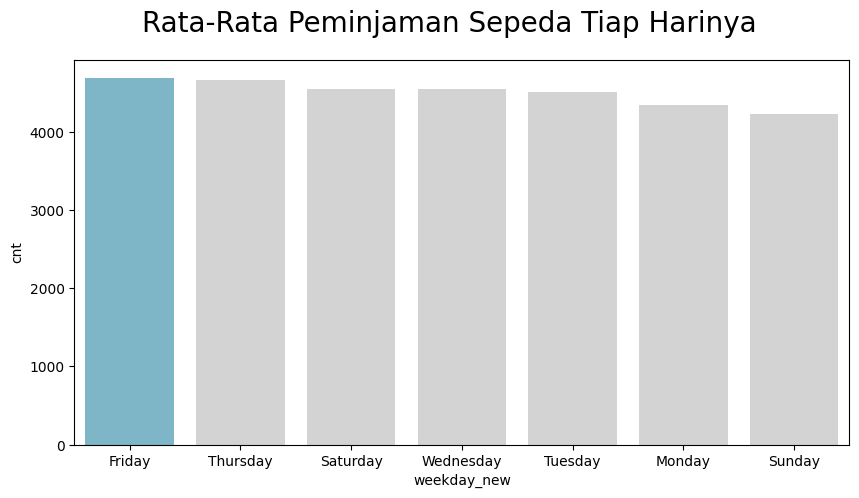

In [33]:
# Create visualization for the question
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 5))

sns.barplot(
    x="weekday_new",
    y="cnt",
    data=weekday_df.sort_values(by="cnt", ascending=False),
    palette=colors)

plt.suptitle("Rata-Rata Peminjaman Sepeda Tiap Harinya", fontsize=20)
plt.show()

### Pertanyaan 4: Bagaimana performa peminjaman sepeda oleh pengguna yang terdaftar tiap bulannya di tahun 2011 - 2012?


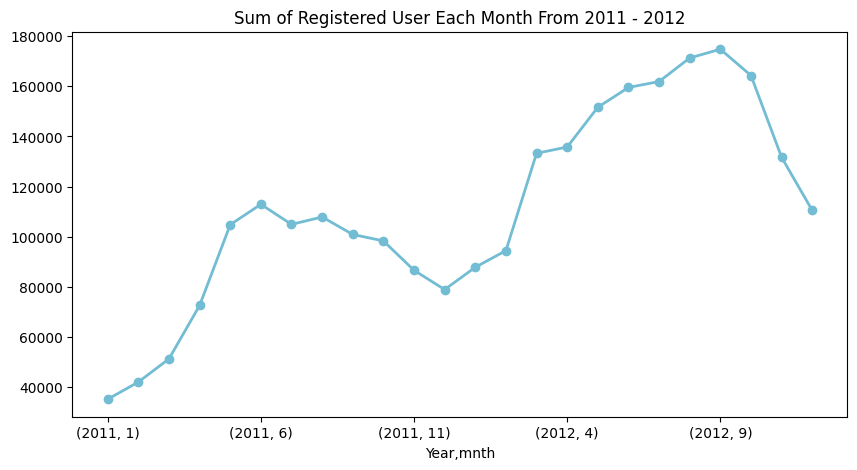

In [34]:
# Create visualization for the question
yr_mnth_df['registered'].plot(
    kind='line',
    figsize=(10, 5),
    marker='o',
    linewidth=2,
    color="#72BCD4",
    title='Sum of Registered User Each Month From 2011 - 2012')
plt.gca().spines[['top', 'right']].set_visible(True)

## Conclusion

- Sepeda paling **banyak dipinjam pada musim gugur sebanyak 1061129** dan paling **sedikit dipinjam pada musim semi sebanyak 471348**.
- Sepeda paling **banyak dipinjam pada pukul 17.00 sebanyak 336860** dan paling **sedikit dipinjam pada pukul 04.00 sebanyak 4428**
- Berdasarkan rata-rata, umumnya sepeda dipinjam pada **Hari Jumat dengan jumlah 4690**
- Performa peminjaman sepeda oleh pengguna yang terdaftar tiap bulannya berada di titik tertinggi pada **September 2012 yang mencapai 218573**. Kemudian, peminjaman sepeda oleh pengguna yang terdaftar **meningkat pesat pada Maret 2012 yang mencapai 61738**, tetapi mengalami **penurunan drastis pada Oktober 2012 dan terus mengalami penurunan hingga Desember 2012 yang menyentuh angka 123713**

## RFM Analysis

In [35]:
rfm_df = day_df.groupby(by="weekday_new", as_index=False).agg({
    "dteday": "max", # mengambil tanggal peminjaman terakhir
    "cnt": "sum" # menghitung jumlah peminjaman
})
rfm_df.columns = ["weekday", "max_order_timestamp", "frequency"]

# menghitung kapan terakhir pelanggan melakukan peminjaman (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,weekday,frequency,recency
0,Friday,487790,3
1,Monday,455503,0
2,Saturday,477807,2
3,Sunday,444027,1
4,Thursday,485395,4


<ipython-input-36-098132313d9d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="weekday", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-36-098132313d9d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="weekday", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])


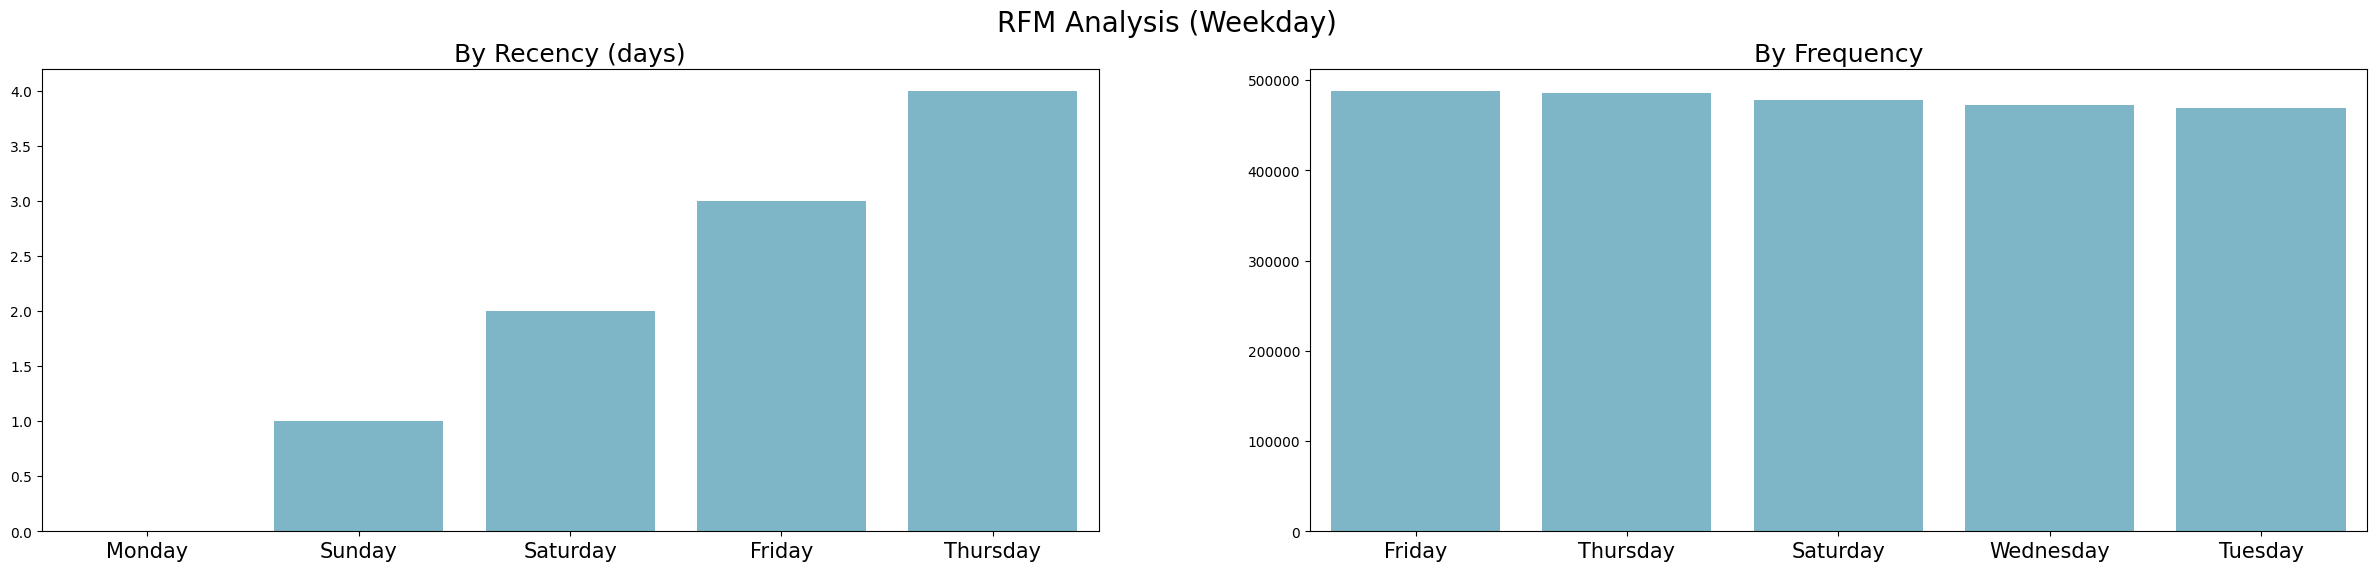

In [36]:
# Create visualization for the RFM Analysis
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="weekday", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="weekday", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("RFM Analysis (Weekday)", fontsize=20)
plt.show()

- Apabila pengguna terdaftar dan pengguna biasa digabung, maka akhir-akhir ini (recency) mereka lebih memilih meminjam sepeda pada **Hari Kamis**
- Apabila pengguna terdaftar dan pengguna biasa digabung, maka mereka lebih sering (frequency) meminjam sepeda pada **Hari Jumat**